# Implementing the simple model

In [1]:
#Import the relevant modules
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import OpinionGraph
import OpinionAlgorithm

## Create random graph
This is implemented as a `MultiGraph` from `Networkx` which can have self-loops and multi-edges. The function that creates the random graph, `OpinionGraph.CreateRandom` creates a graph with NO self-loops and NO multi-edges.

In [2]:
n = 30 # number of nodes
m = 120 #number of edges
gamma = 10 #ratio #nodes/#opinions
n_opinion = int(n/gamma) #number of opinions

#Generate random graph
G1 = OpinionGraph.CreateRandom(n, m, n_opinion)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


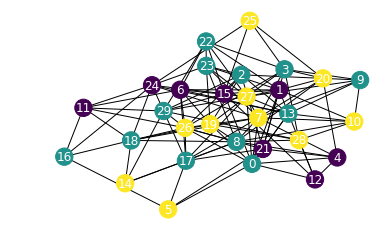

In [3]:
#plot the opinion graph
OpinionGraph.Plot(G1)

In [4]:
OpinionGraph.summary(G1)

Total number of components: 1
Components size: Counter({30: 1})
All components in consensus: False
Percentage of nodes in components in consensus state: 0.0


## Tests of the algorithm
### A) With $\phi=1$, i.e. only step 1

------------- Initial graph ------------


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


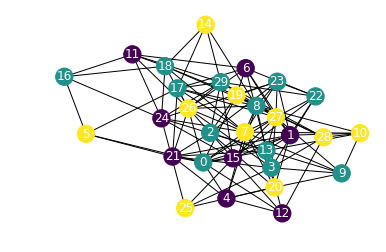

------------- Step 0 ------------
Selected node_i : 4
DOING STEP 1
Neighbors of node_i : [0, 12, 7, 20, 21, 8]
Selected node_j : 12
Nodes with opinion g_i : [1, 4, 6, 11, 12, 15, 21, 24]
Selected node_j_prime : 4
Edge moved from (4,12) to (4,4)


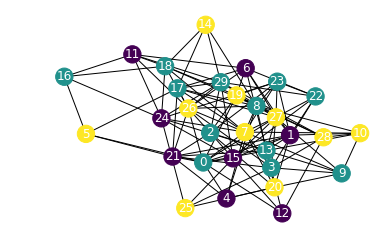

------------- Step 1 ------------
Selected node_i : 26
DOING STEP 1
Neighbors of node_i : [0, 2, 3, 6, 7, 8, 11, 17, 18, 21, 29]
Selected node_j : 8
Nodes with opinion g_i : [5, 7, 10, 14, 19, 20, 25, 26, 27, 28]
Selected node_j_prime : 25
Edge moved from (26,8) to (26,25)


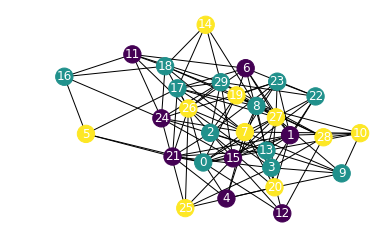

------------- Step 2 ------------
Selected node_i : 15
DOING STEP 1
Neighbors of node_i : [0, 1, 2, 12, 22, 25, 29, 24, 27]
Selected node_j : 12
Nodes with opinion g_i : [1, 4, 6, 11, 12, 15, 21, 24]
Selected node_j_prime : 12
Edge moved from (15,12) to (15,12)


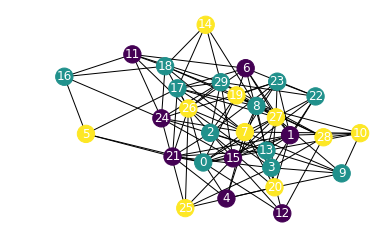

------------- Step 3 ------------
Selected node_i : 13
DOING STEP 1
Neighbors of node_i : [0, 1, 2, 6, 9, 10, 12, 21, 24, 27]
Selected node_j : 10
Nodes with opinion g_i : [0, 2, 3, 8, 9, 13, 16, 17, 18, 22, 23, 29]
Selected node_j_prime : 8
Edge moved from (13,10) to (13,8)


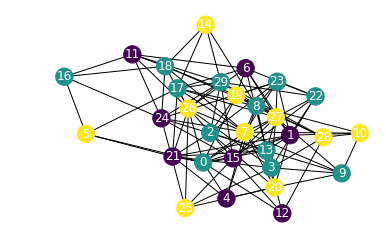

------------- Step 4 ------------
Selected node_i : 3
DOING STEP 1
Neighbors of node_i : [26, 9, 27, 25, 28, 20, 7, 21, 22]
Selected node_j : 22
Nodes with opinion g_i : [0, 2, 3, 8, 9, 13, 16, 17, 18, 22, 23, 29]
Selected node_j_prime : 0
Edge moved from (3,22) to (3,0)


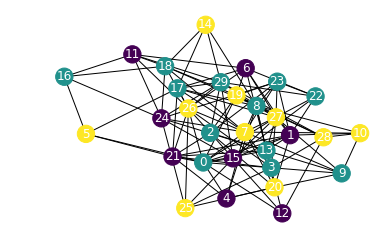

------------- Step 5 ------------
Selected node_i : 29
DOING STEP 1
Neighbors of node_i : [2, 11, 14, 15, 17, 22, 24, 26, 27, 28]
Selected node_j : 24
Nodes with opinion g_i : [0, 2, 3, 8, 9, 13, 16, 17, 18, 22, 23, 29]
Selected node_j_prime : 29
Edge moved from (29,24) to (29,29)


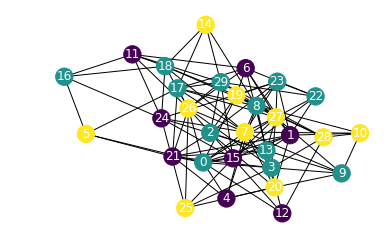

------------- Step 6 ------------
Selected node_i : 3
DOING STEP 1
Neighbors of node_i : [26, 9, 27, 25, 28, 20, 7, 21, 0]
Selected node_j : 26
Nodes with opinion g_i : [0, 2, 3, 8, 9, 13, 16, 17, 18, 22, 23, 29]
Selected node_j_prime : 8
Edge moved from (3,26) to (3,8)


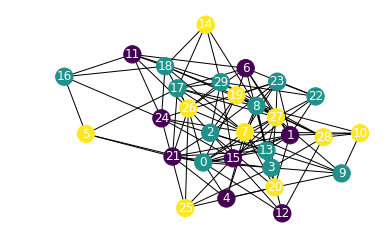

------------- Step 7 ------------
Selected node_i : 5
DOING STEP 1
Neighbors of node_i : [0, 21, 17, 16]
Selected node_j : 17
Nodes with opinion g_i : [5, 7, 10, 14, 19, 20, 25, 26, 27, 28]
Selected node_j_prime : 25
Edge moved from (5,17) to (5,25)


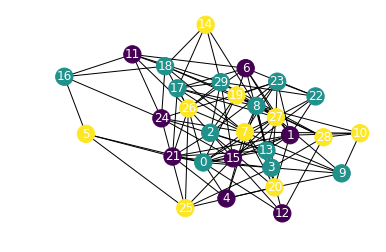

------------- Step 8 ------------
Selected node_i : 15
DOING STEP 1
Neighbors of node_i : [0, 1, 2, 22, 25, 29, 24, 27, 12]
Selected node_j : 2
Nodes with opinion g_i : [1, 4, 6, 11, 12, 15, 21, 24]
Selected node_j_prime : 24
Edge moved from (15,2) to (15,24)


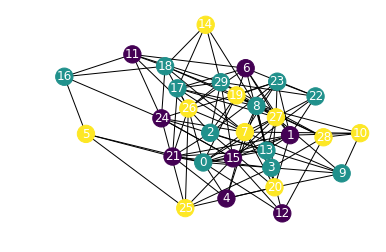

------------- Step 9 ------------
Selected node_i : 10
DOING STEP 1
Neighbors of node_i : [1, 7, 8, 9, 28]
Selected node_j : 28
Nodes with opinion g_i : [5, 7, 10, 14, 19, 20, 25, 26, 27, 28]
Selected node_j_prime : 14
Edge moved from (10,28) to (10,14)


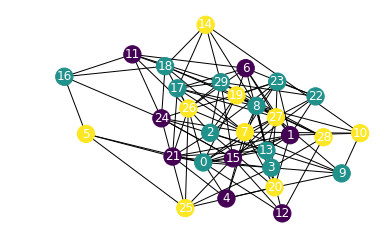

In [5]:
phi = 1
n_step = 10
OpinionAlgorithm.Simulation(G1, phi, n_step, verbose=True)

------------- Initial graph ------------


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


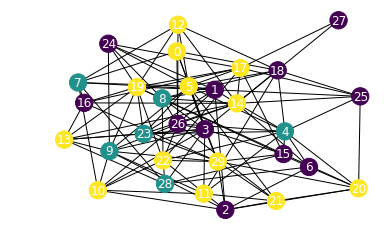

------------- Final graph -------------
**** Same layout **** 


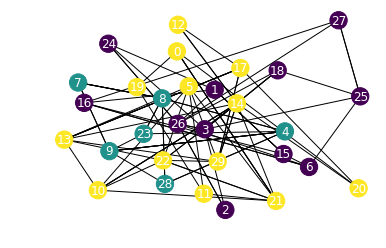

**** New layout **** 


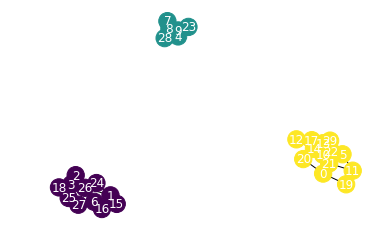

In [6]:
n_step = 1000
G2 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.Simulation(G2, phi, n_step, verboseBeginEnd=True)

In [7]:
OpinionGraph.summary(G2)

Total number of components: 3
Components size: Counter({13: 1, 11: 1, 6: 1})
All components in consensus: True
Percentage of nodes in components in consensus state: 1.0


In [8]:
G3 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.SimulationEndConsensus(G3, phi, verbose=False)

448

In [9]:
OpinionGraph.summary(G3)

Total number of components: 3
Components size: Counter({11: 1, 13: 1, 6: 1})
All components in consensus: True
Percentage of nodes in components in consensus state: 1.0


### B) With $\phi=0$, i.e. only step 2

------------- Initial graph ------------


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


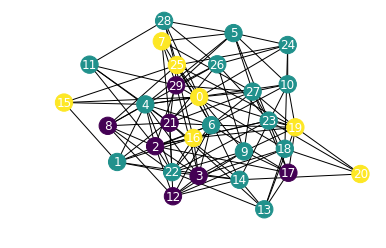

------------- Step 0 ------------
Selected node_i : 8
DOING STEP 2
Neighbors of node_i : [2, 4, 21, 22, 26, 12, 25]
Selected node_j : 26
Opinion of node 8 changed from 0 to 1


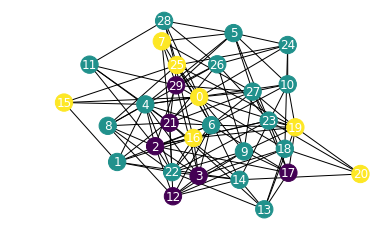

------------- Step 1 ------------
Selected node_i : 0
DOING STEP 2
Neighbors of node_i : [1, 14, 27, 25, 28, 15, 4, 19, 9, 24]
Selected node_j : 15
Opinion of node 0 changed from 2 to 2


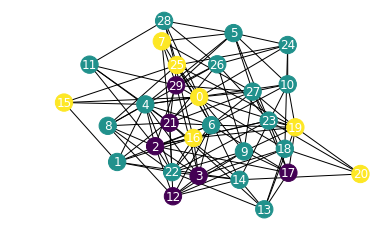

------------- Step 2 ------------
Selected node_i : 3
DOING STEP 2
Neighbors of node_i : [2, 6, 29, 18, 12, 4, 16, 9]
Selected node_j : 6
Opinion of node 3 changed from 0 to 1


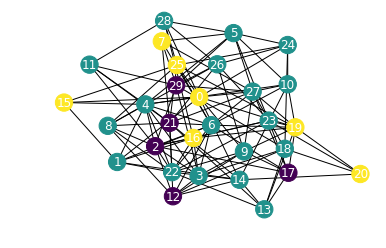

------------- Step 3 ------------
Selected node_i : 23
DOING STEP 2
Neighbors of node_i : [2, 5, 16, 17, 19, 20, 22, 26]
Selected node_j : 5
Opinion of node 23 changed from 1 to 1


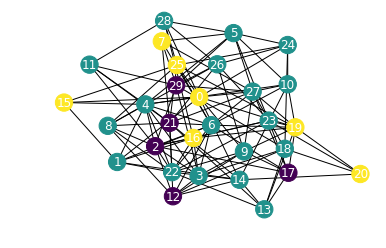

------------- Step 4 ------------
Selected node_i : 23
DOING STEP 2
Neighbors of node_i : [2, 5, 16, 17, 19, 20, 22, 26]
Selected node_j : 26
Opinion of node 23 changed from 1 to 1


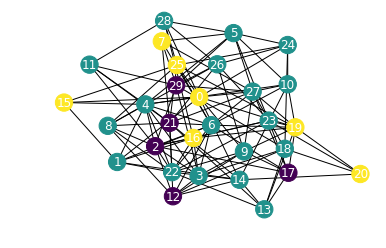

------------- Step 5 ------------
Selected node_i : 24
DOING STEP 2
Neighbors of node_i : [0, 5, 10, 18, 25, 26]
Selected node_j : 10
Opinion of node 24 changed from 1 to 1


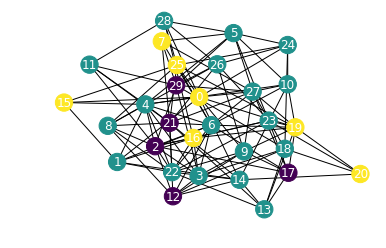

------------- Step 6 ------------
Selected node_i : 18
DOING STEP 2
Neighbors of node_i : [3, 12, 13, 20, 24, 29, 27]
Selected node_j : 20
Opinion of node 18 changed from 1 to 2


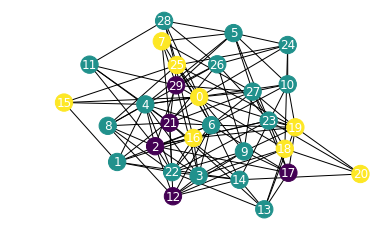

------------- Step 7 ------------
Selected node_i : 5
DOING STEP 2
Neighbors of node_i : [4, 24, 29, 10, 28, 7, 27, 23]
Selected node_j : 24
Opinion of node 5 changed from 1 to 1


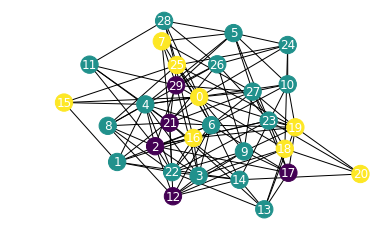

------------- Step 8 ------------
Selected node_i : 27
DOING STEP 2
Neighbors of node_i : [0, 5, 6, 7, 9, 10, 17, 18, 19, 21, 29]
Selected node_j : 19
Opinion of node 27 changed from 1 to 2


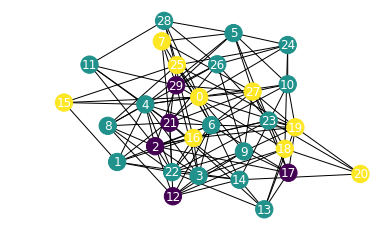

------------- Step 9 ------------
Selected node_i : 26
DOING STEP 2
Neighbors of node_i : [8, 9, 21, 23, 24, 28, 29]
Selected node_j : 23
Opinion of node 26 changed from 1 to 1


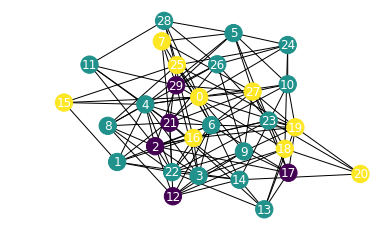

------------- Step 10 ------------
Selected node_i : 29
DOING STEP 2
Neighbors of node_i : [2, 3, 5, 7, 11, 18, 26, 27]
Selected node_j : 2
Opinion of node 29 changed from 0 to 0


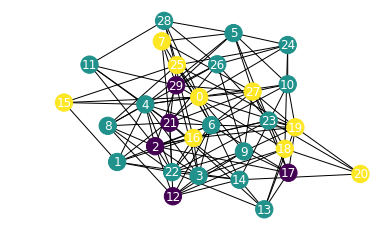

------------- Step 11 ------------
Selected node_i : 18
DOING STEP 2
Neighbors of node_i : [3, 12, 13, 20, 24, 29, 27]
Selected node_j : 12
Opinion of node 18 changed from 2 to 0


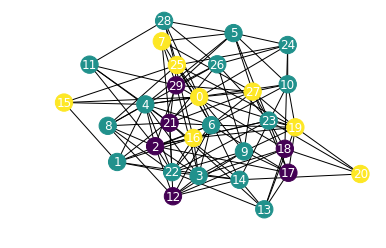

------------- Step 12 ------------
Selected node_i : 9
DOING STEP 2
Neighbors of node_i : [0, 3, 17, 26, 19, 22, 27, 12]
Selected node_j : 22
Opinion of node 9 changed from 1 to 1


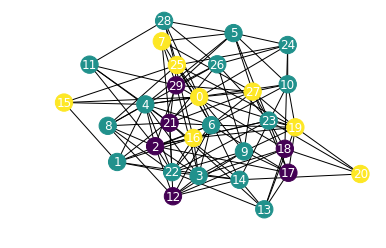

------------- Step 13 ------------
Selected node_i : 6
DOING STEP 2
Neighbors of node_i : [1, 2, 3, 4, 17, 22, 12, 10, 25, 19, 21, 7, 27]
Selected node_j : 25
Opinion of node 6 changed from 1 to 2


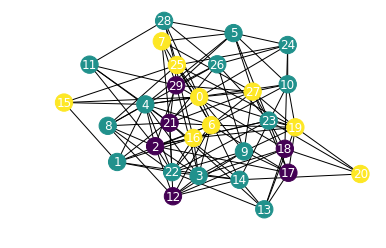

------------- Step 14 ------------
Selected node_i : 5
DOING STEP 2
Neighbors of node_i : [4, 24, 29, 10, 28, 7, 27, 23]
Selected node_j : 27
Opinion of node 5 changed from 1 to 2


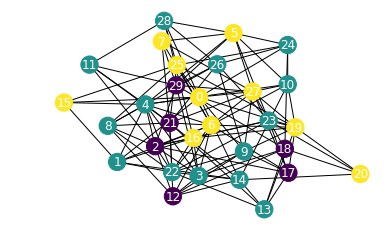

------------- Step 15 ------------
Selected node_i : 25
DOING STEP 2
Neighbors of node_i : [0, 6, 8, 15, 19, 21, 24, 28]
Selected node_j : 21
Opinion of node 25 changed from 2 to 0


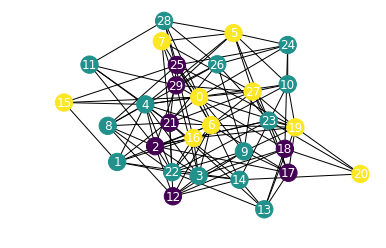

------------- Step 16 ------------
Selected node_i : 9
DOING STEP 2
Neighbors of node_i : [0, 3, 17, 26, 19, 22, 27, 12]
Selected node_j : 12
Opinion of node 9 changed from 1 to 0


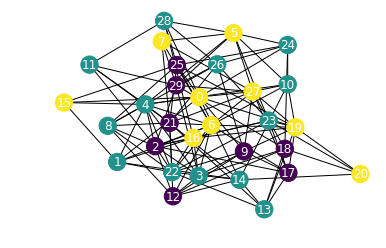

------------- Step 17 ------------
Selected node_i : 7
DOING STEP 2
Neighbors of node_i : [5, 6, 27, 29, 21]
Selected node_j : 27
Opinion of node 7 changed from 2 to 2


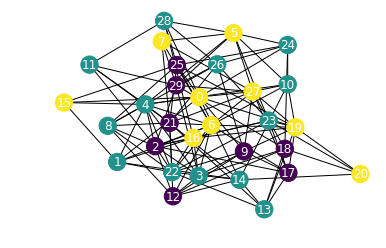

------------- Step 18 ------------
Selected node_i : 23
DOING STEP 2
Neighbors of node_i : [2, 5, 16, 17, 19, 20, 22, 26]
Selected node_j : 5
Opinion of node 23 changed from 1 to 2


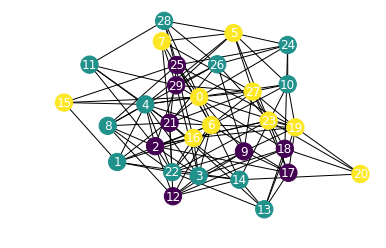

------------- Step 19 ------------
Selected node_i : 28
DOING STEP 2
Neighbors of node_i : [0, 5, 11, 16, 25, 26]
Selected node_j : 0
Opinion of node 28 changed from 1 to 2


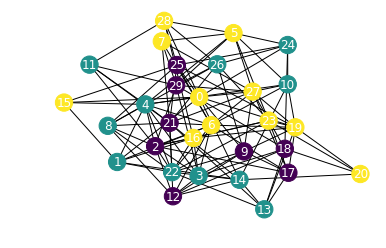

------------- Step 20 ------------
Selected node_i : 8
DOING STEP 2
Neighbors of node_i : [2, 4, 21, 22, 26, 12, 25]
Selected node_j : 12
Opinion of node 8 changed from 1 to 0


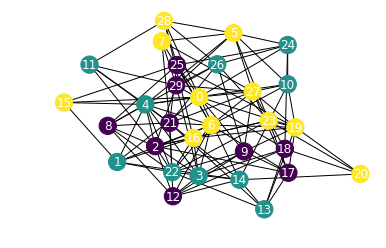

------------- Step 21 ------------
Selected node_i : 2
DOING STEP 2
Neighbors of node_i : [3, 4, 11, 23, 22, 6, 16, 12, 8, 17, 29]
Selected node_j : 23
Opinion of node 2 changed from 0 to 2


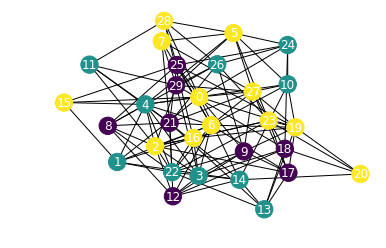

------------- Step 22 ------------
Selected node_i : 27
DOING STEP 2
Neighbors of node_i : [0, 5, 6, 7, 9, 10, 17, 18, 19, 21, 29]
Selected node_j : 6
Opinion of node 27 changed from 2 to 2


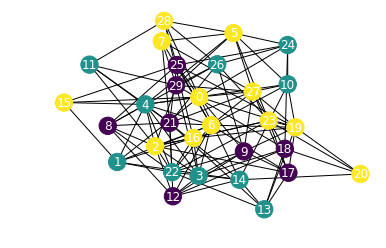

------------- Step 23 ------------
Selected node_i : 0
DOING STEP 2
Neighbors of node_i : [1, 14, 27, 25, 28, 15, 4, 19, 9, 24]
Selected node_j : 15
Opinion of node 0 changed from 2 to 2


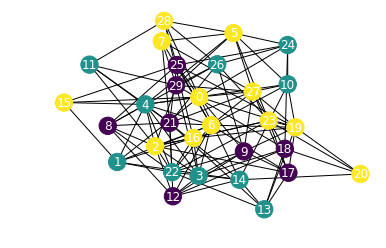

------------- Step 24 ------------
Selected node_i : 19
DOING STEP 2
Neighbors of node_i : [0, 6, 9, 10, 13, 16, 17, 23, 25, 20, 27]
Selected node_j : 27
Opinion of node 19 changed from 2 to 2


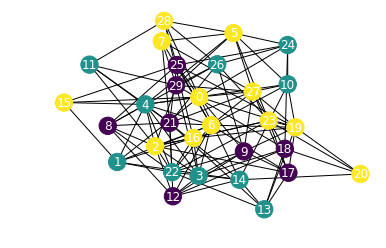

------------- Step 25 ------------
Selected node_i : 10
DOING STEP 2
Neighbors of node_i : [4, 5, 6, 14, 24, 27, 19]
Selected node_j : 14
Opinion of node 10 changed from 1 to 1


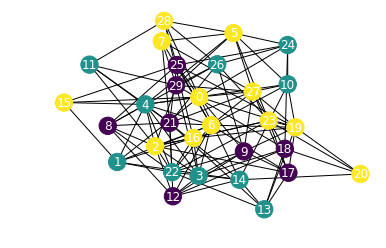

------------- Step 26 ------------
Selected node_i : 12
DOING STEP 2
Neighbors of node_i : [2, 3, 6, 8, 9, 21, 14, 18]
Selected node_j : 18
Opinion of node 12 changed from 0 to 0


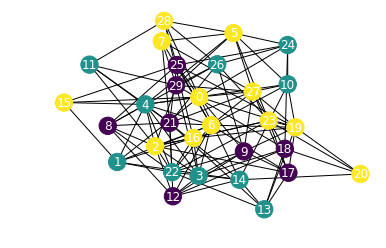

------------- Step 27 ------------
Selected node_i : 15
DOING STEP 2
Neighbors of node_i : [0, 1, 4, 25]
Selected node_j : 4
Opinion of node 15 changed from 2 to 1


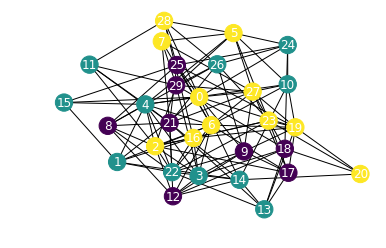

------------- Step 28 ------------
Selected node_i : 24
DOING STEP 2
Neighbors of node_i : [0, 5, 10, 18, 25, 26]
Selected node_j : 0
Opinion of node 24 changed from 1 to 2


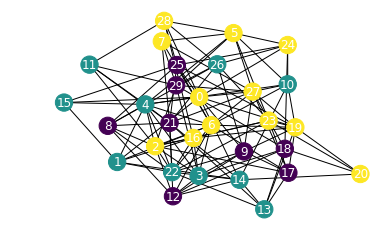

------------- Step 29 ------------
Selected node_i : 17
DOING STEP 2
Neighbors of node_i : [2, 6, 9, 13, 23, 19, 27]
Selected node_j : 13
Opinion of node 17 changed from 0 to 1


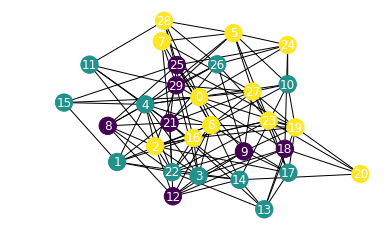

In [10]:
phi = 0
n_step = 30
G4 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.Simulation(G4, phi, n_step, verbose=True)

------------- Initial graph ------------


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


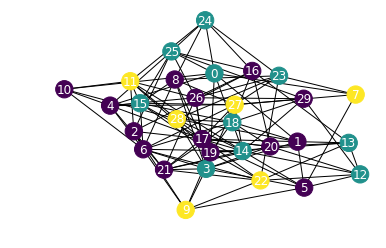

------------- Final graph -------------
**** Same layout **** 


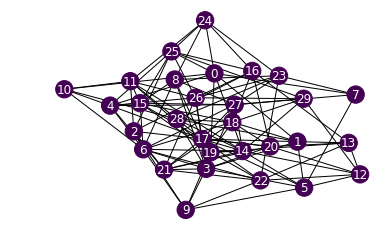

**** New layout **** 


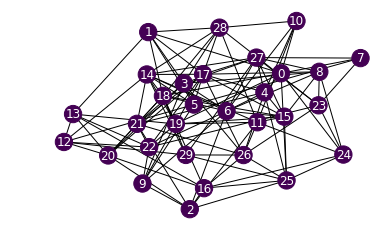

In [11]:
n_step = 1000
G5 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.Simulation(G5, phi, n_step, verboseBeginEnd=True)

In [12]:
OpinionGraph.summary(G5)

Total number of components: 1
Components size: Counter({30: 1})
All components in consensus: True
Percentage of nodes in components in consensus state: 1.0


In [13]:
G6 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.SimulationEndConsensus(G6, phi, verbose=False)

309

In [14]:
OpinionGraph.summary(G6)

Total number of components: 1
Components size: Counter({30: 1})
All components in consensus: True
Percentage of nodes in components in consensus state: 1.0
